# Quiz 1

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import edhec_toolbox as tb

In [3]:
df_data = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                       header=0, index_col=0, na_values=-99.99)
df_returns = df_data[['Lo 20', 'Hi 20']]
df_returns.columns = ['SmallCap', 'LargeCap']
df_returns = df_returns/100
df_returns.index = pd.to_datetime(df_returns.index, format="%Y%m").to_period('M')

In [4]:
df_returns.head()

,SmallCap,LargeCap
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


In [5]:
# Get annualized returns
returns_annualized = (((1 + df_returns).prod())**(12/df_returns.shape[0])) - 1
returns_annualized

SmallCap    0.151977
LargeCap    0.098490
dtype: float64

In [6]:
# Get annualized volatility
vol_annualized = df_returns.std()*np.sqrt(12)
vol_annualized

SmallCap    0.336701
LargeCap    0.195116
dtype: float64

In [7]:
# Annualized returns from 1999 to 2015
_df = df_returns['1999':'2015']
(((1 + _df).prod())**(12/_df.shape[0])) - 1

SmallCap    0.114426
LargeCap    0.062865
dtype: float64

In [8]:
# Annualized volatility from 1999 to 2015
_df.std()*np.sqrt(12)

SmallCap    0.228894
LargeCap    0.172713
dtype: float64

## Drawdown for period 1999 to 2015

### Small Caps

In [13]:
df_drawdown_scap = tb.drawdown(_df['SmallCap'])

<AxesSubplot:>

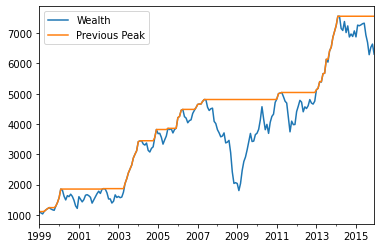

In [17]:
df_drawdown_scap[['Wealth', 'Previous Peak']].plot()

In [21]:
df_drawdown_scap['Drawdown'].min()

-0.6248092431236988

In [22]:
# Get period of max drawdown
df_drawdown_scap['Drawdown'].idxmin()

Period('2009-02', 'M')

### Large Caps

In [23]:
df_drawdown_lcap = tb.drawdown(_df['LargeCap'])

<AxesSubplot:>

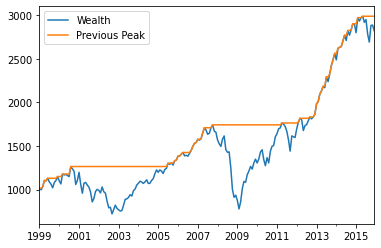

In [24]:
df_drawdown_lcap[['Wealth', 'Previous Peak']].plot()

In [25]:
df_drawdown_lcap['Drawdown'].min()

-0.5527349978713653

In [26]:
# Get period of max drawdown
df_drawdown_lcap['Drawdown'].idxmin()

Period('2009-02', 'M')

## Semi std

In [33]:
df_hfi = pd.read_csv("data/edhec-hedgefundindices.csv",
                      header=0, index_col=0, parse_dates=True)
df_hfi = df_hfi/100
df_hfi.index = df_hfi.index.to_period('M')

In [35]:
df_hfi["2009":][hfi<0].std(ddof=0).sort_values()

Fixed Income Arbitrage    0.003321
Merger Arbitrage          0.003611
Global Macro              0.005075
Equity Market Neutral     0.005186
Relative Value            0.005711
Convertible Arbitrage     0.006681
Funds Of Funds            0.007948
Distressed Securities     0.009498
Event Driven              0.010135
CTA Global                0.010996
Long/Short Equity         0.012139
Emerging Markets          0.015276
Short Selling             0.021240
dtype: float64

## Skewness

In [37]:
tb.skewness(df_hfi["2009":]).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

## Kurtosis

In [41]:
tb.kurtosis(df_hfi["2000":]).sort_values()

CTA Global                 2.845022
Global Macro               3.653278
Short Selling              4.352758
Long/Short Equity          4.472589
Merger Arbitrage           4.520785
Event Driven               5.543444
Emerging Markets           5.941289
Distressed Securities      6.231720
Funds Of Funds             7.584725
Relative Value            12.731096
Equity Market Neutral     20.329621
Convertible Arbitrage     23.001449
Fixed Income Arbitrage    33.378729
dtype: float64